In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle datasets download grassknoted/asl-alphabet

100% 1.02G/1.03G [00:37<00:00, 31.9MB/s]
100% 1.03G/1.03G [00:37<00:00, 29.3MB/s]


In [ ]:
!unzip asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import skimage
from skimage.transform import resize
from IPython.display import Image, display

import tensorflow as tf
from tensorflow import keras
import os
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
train_path = '/content/asl_alphabet_train/asl_alphabet_train'
test_path = '/content/asl_alphabet_test/asl_alphabet_test'

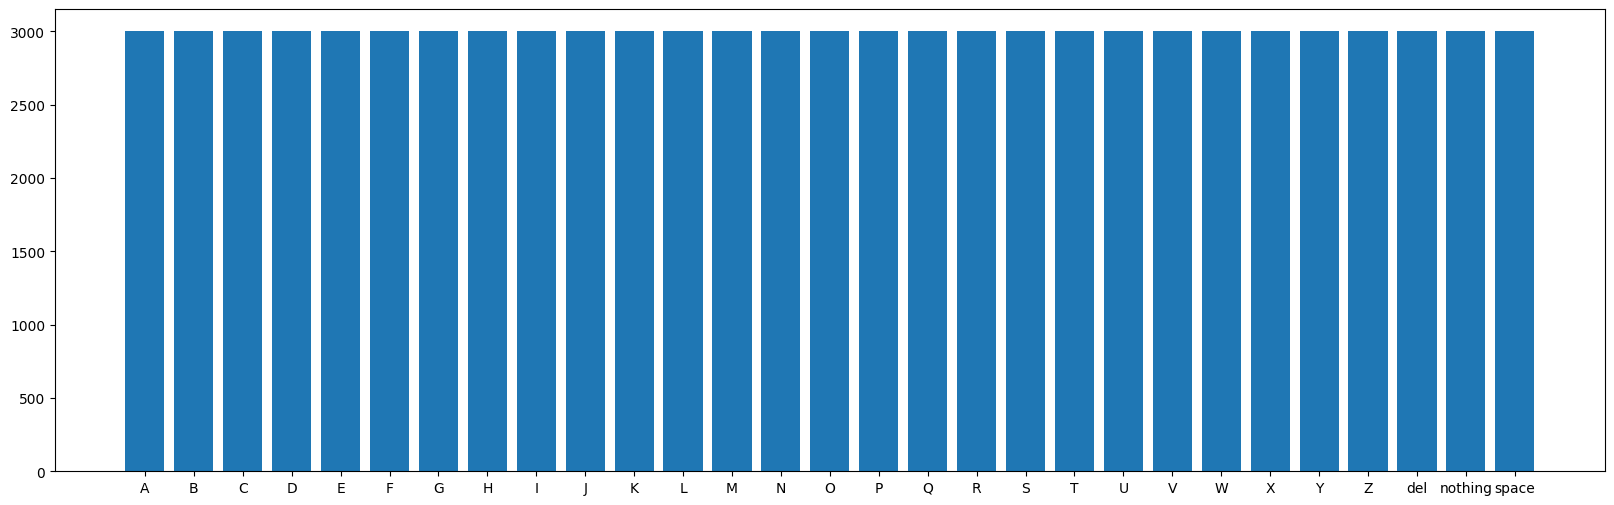

In [ ]:
classes = sorted(os.listdir(train_path))
numbers = []

for i in classes:
  numbers.append(len(os.listdir(train_path + '/' + i)))
  
plt.figure(figsize = (20,6))
plt.bar(classes, numbers)
plt.show()

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

A


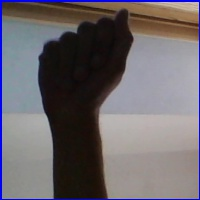

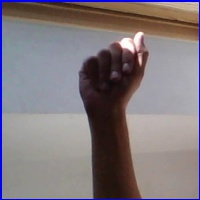

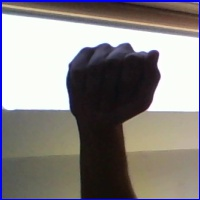

There are 3000 images in A class.

B


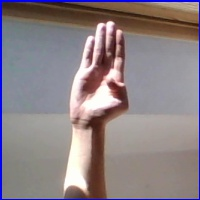

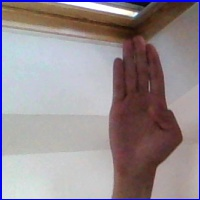

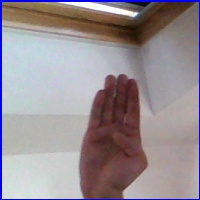

There are 3000 images in B class.

C


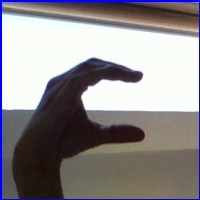

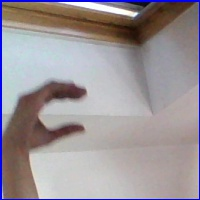

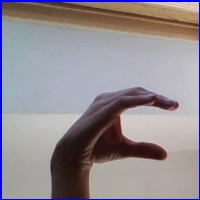

There are 3000 images in C class.

D


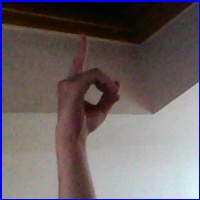

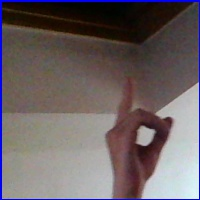

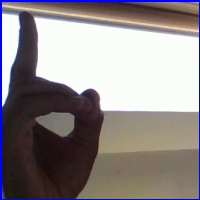

There are 3000 images in D class.

E


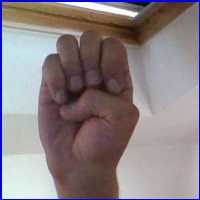

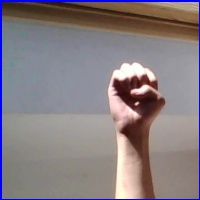

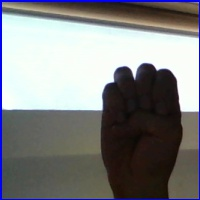

There are 3000 images in E class.

F


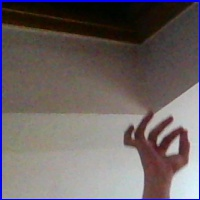

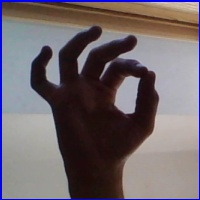

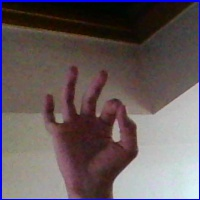

There are 3000 images in F class.

G


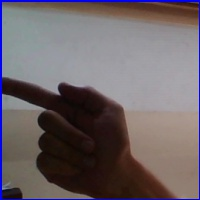

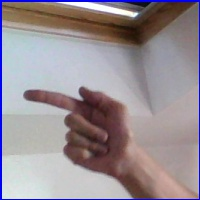

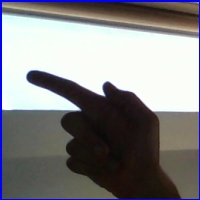

There are 3000 images in G class.

H


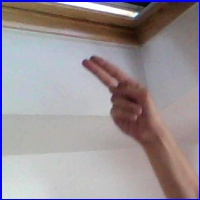

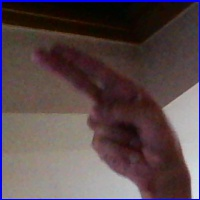

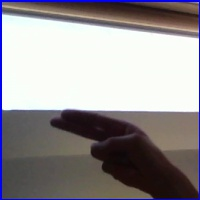

There are 3000 images in H class.

I


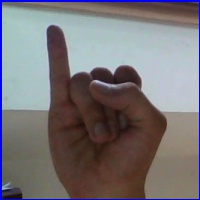

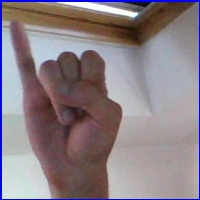

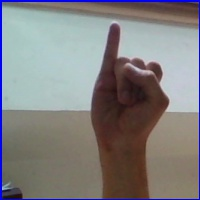

There are 3000 images in I class.

J


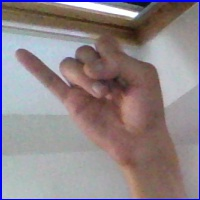

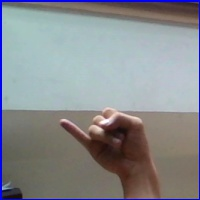

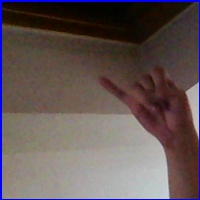

There are 3000 images in J class.

K


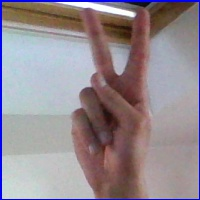

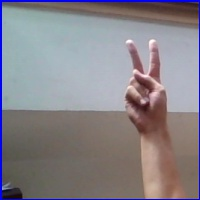

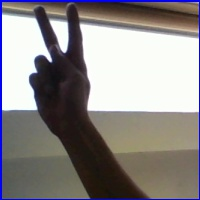

There are 3000 images in K class.

L


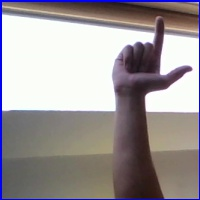

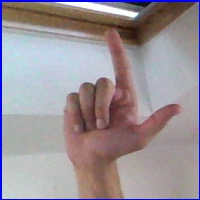

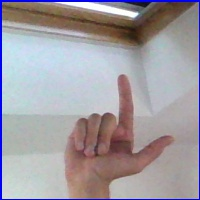

There are 3000 images in L class.

M


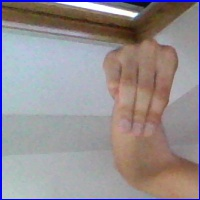

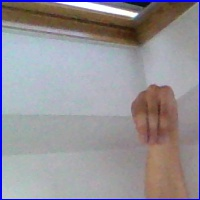

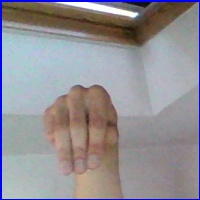

There are 3000 images in M class.

N


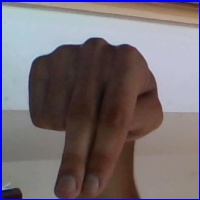

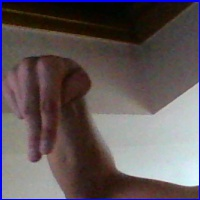

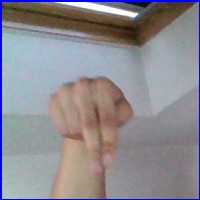

There are 3000 images in N class.

O


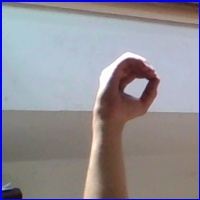

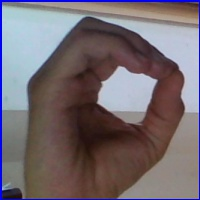

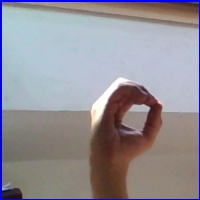

There are 3000 images in O class.

P


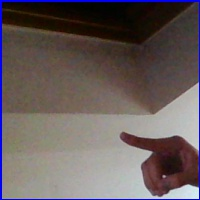

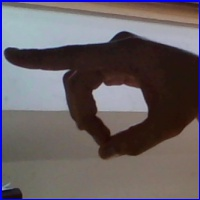

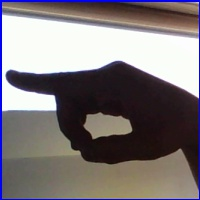

There are 3000 images in P class.

Q


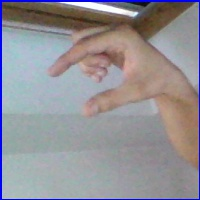

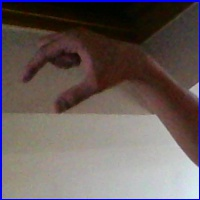

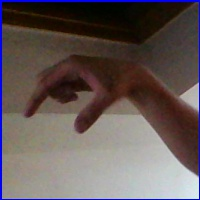

There are 3000 images in Q class.

R


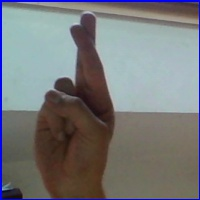

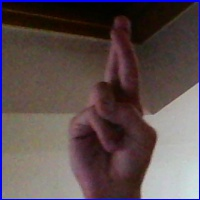

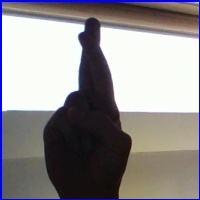

There are 3000 images in R class.

S


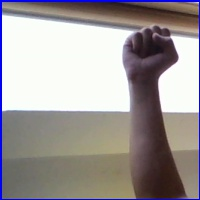

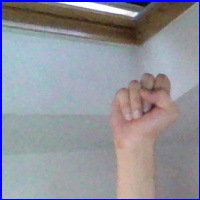

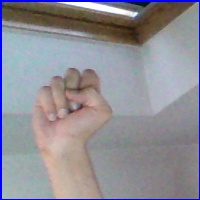

There are 3000 images in S class.

T


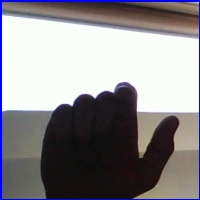

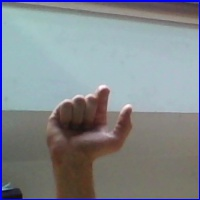

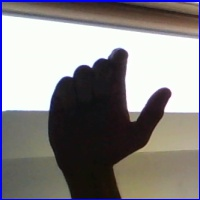

There are 3000 images in T class.

U


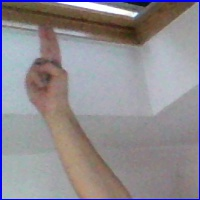

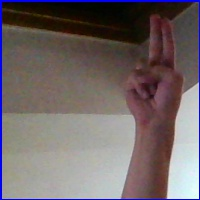

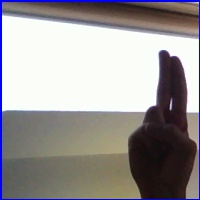

There are 3000 images in U class.

V


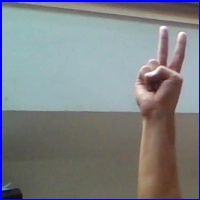

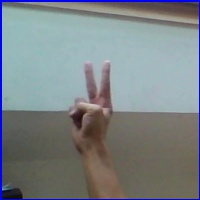

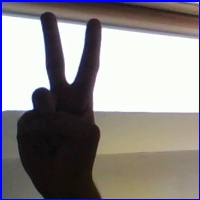

There are 3000 images in V class.

W


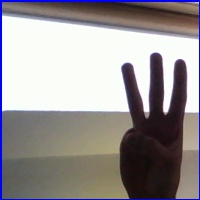

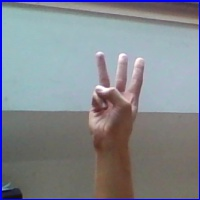

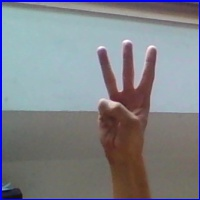

There are 3000 images in W class.

X


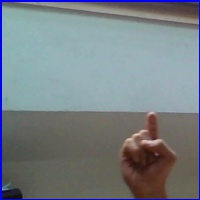

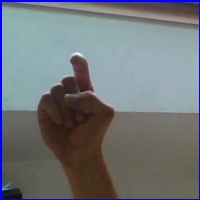

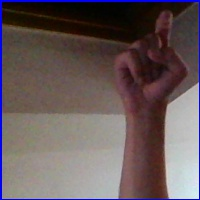

There are 3000 images in X class.

Y


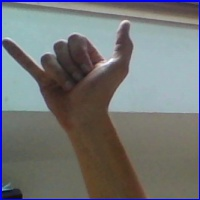

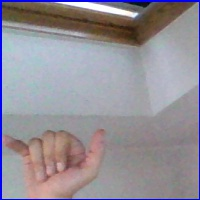

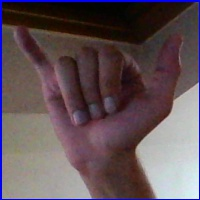

There are 3000 images in Y class.

Z


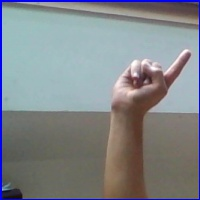

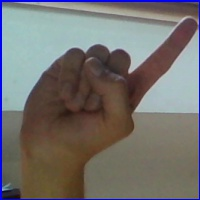

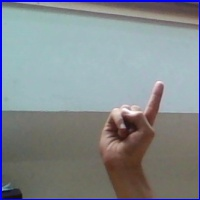

There are 3000 images in Z class.

del


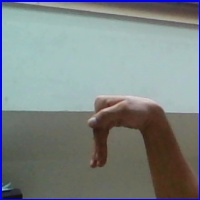

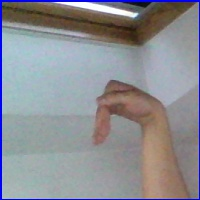

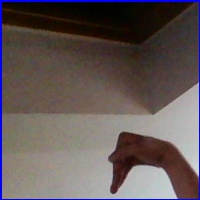

There are 3000 images in del class.

nothing


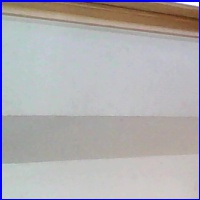

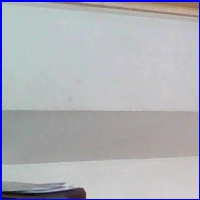

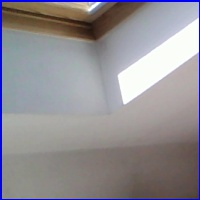

There are 3000 images in nothing class.

space


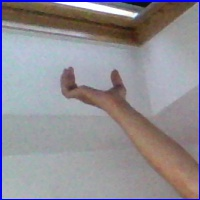

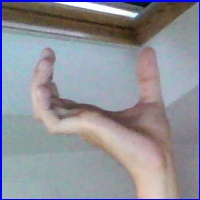

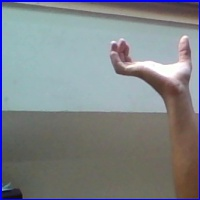

There are 3000 images in space class.


In [ ]:
labels = sorted(os.listdir(train_path))
print(labels)

for i in labels:
  path = train_path + '/' + i
  folder_data = os.listdir(path)
  k = 0
  print("")
  print(i)
  for image_path in folder_data:
    if k < 3:
      display(Image(path + '/' + image_path))
    k += 1
  print('There are', k, 'images in', i, 'class.')

In [ ]:
def obtain_data(data_dir):
  images = []
  labels = []
  dir_list = sorted(os.listdir(data_dir))
  for i in range(len(dir_list)):
    print('Obtaining', dir_list[i], 'images.')
    for image in os.listdir(data_dir + '/' + dir_list[i]):
      img = cv2.imread(data_dir + '/' + dir_list[i] + '/' + image)
      img = cv2.resize(img, (32, 32))
      images.append(img)
      labels.append(i)
  return images, labels

x, y = obtain_data(train_path)

Obtaining A images.
Obtaining B images.
Obtaining C images.
Obtaining D images.
Obtaining E images.
Obtaining F images.
Obtaining G images.
Obtaining H images.
Obtaining I images.
Obtaining J images.
Obtaining K images.
Obtaining L images.
Obtaining M images.
Obtaining N images.
Obtaining O images.
Obtaining P images.
Obtaining Q images.
Obtaining R images.
Obtaining S images.
Obtaining T images.
Obtaining U images.
Obtaining V images.
Obtaining W images.
Obtaining X images.
Obtaining Y images.
Obtaining Z images.
Obtaining del images.
Obtaining nothing images.
Obtaining space images.


In [ ]:
def preprocess_data(x, y):
  np_x = np.array(x)
  normalised_x = np_x.astype('float32') / 255
  label_encoded_y = utils.to_categorical(y)
  x_train, x_valtest, y_train, y_valtest = train_test_split(normalised_x, label_encoded_y, train_size = 0.8)
  x_val, x_test, y_val, y_test = train_test_split(x_valtest, y_valtest, test_size = 0.5)
  return x_train, x_val, x_test, y_train, y_val, y_test

x_train, x_val, x_test, y_train, y_val, y_test = preprocess_data(x, y)

In [ ]:
print("Training data:", x_train.shape)
print("Validation data:", x_val.shape)
print("Test data:", x_test.shape)

Training data: (69600, 32, 32, 3)
Validation data: (8700, 32, 32, 3)
Test data: (8700, 32, 32, 3)


In [ ]:
from keras import Sequential
from keras import layers

model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(29, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 activation_3 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 activation_4 (Activation)   (None, 12, 12, 64)        0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                 

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_val, y_val))

Epoch 1/10
2175/2175 [==============================] - 126s 57ms/step - loss: 1.0601 - accuracy: 0.6671 - val_loss: 0.3920 - val_accuracy: 0.8598
Epoch 2/10
2175/2175 [==============================] - 140s 64ms/step - loss: 0.2360 - accuracy: 0.9204 - val_loss: 0.1623 - val_accuracy: 0.9424
Epoch 3/10
2175/2175 [==============================] - 119s 55ms/step - loss: 0.1278 - accuracy: 0.9576 - val_loss: 0.1183 - val_accuracy: 0.9595
Epoch 4/10
2175/2175 [==============================] - 119s 55ms/step - loss: 0.0808 - accuracy: 0.9739 - val_loss: 0.1071 - val_accuracy: 0.9667
Epoch 5/10
2175/2175 [==============================] - 118s 54ms/step - loss: 0.0669 - accuracy: 0.9788 - val_loss: 0.0850 - val_accuracy: 0.9708
Epoch 6/10
2175/2175 [==============================] - 116s 53ms/step - loss: 0.0622 - accuracy: 0.9794 - val_loss: 0.0430 - val_accuracy: 0.9864
Epoch 7/10
2175/2175 [==============================] - 121s 56ms/step - loss: 0.0466 - accuracy: 0.9856 - val_loss: 0

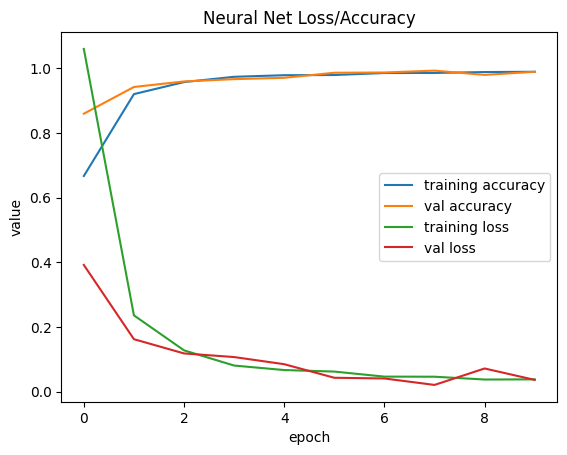

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Neural Net Loss/Accuracy')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)

272/272 [==============================] - 4s 14ms/step - loss: 0.0399 - accuracy: 0.9892
Test Accuracy: 0.9891954064369202
Test Loss: 0.03993438184261322


In [ ]:
y_pred = np.argmax(model.predict(x_test), axis = -1)
y_pred

272/272 [==============================] - 4s 14ms/step


array([27, 21, 25, ...,  0, 16,  9])

In [ ]:
y_testing = np.argmax(y_test, axis = 1)
y_testing

array([27, 21, 25, ...,  0, 16,  9])

In [ ]:
print('The accuracy obtained on the test set using Neural Net is:', accuracy_score(y_pred, y_testing))

The accuracy obtained on the test set using Neural Net is: 0.9891954022988506


In [ ]:
print(classification_report(y_testing, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       301
           1       1.00      1.00      1.00       300
           2       1.00      0.95      0.98       283
           3       0.99      0.98      0.99       292
           4       0.99      0.99      0.99       307
           5       1.00      0.97      0.99       320
           6       0.97      1.00      0.99       304
           7       1.00      1.00      1.00       305
           8       1.00      0.98      0.99       318
           9       0.99      1.00      1.00       302
          10       0.98      1.00      0.99       290
          11       1.00      1.00      1.00       314
          12       0.96      0.99      0.97       289
          13       0.98      0.99      0.99       306
          14       1.00      0.98      0.99       273
          15       0.99      1.00      0.99       282
          16       1.00      0.99      0.99       281
          17       0.97    

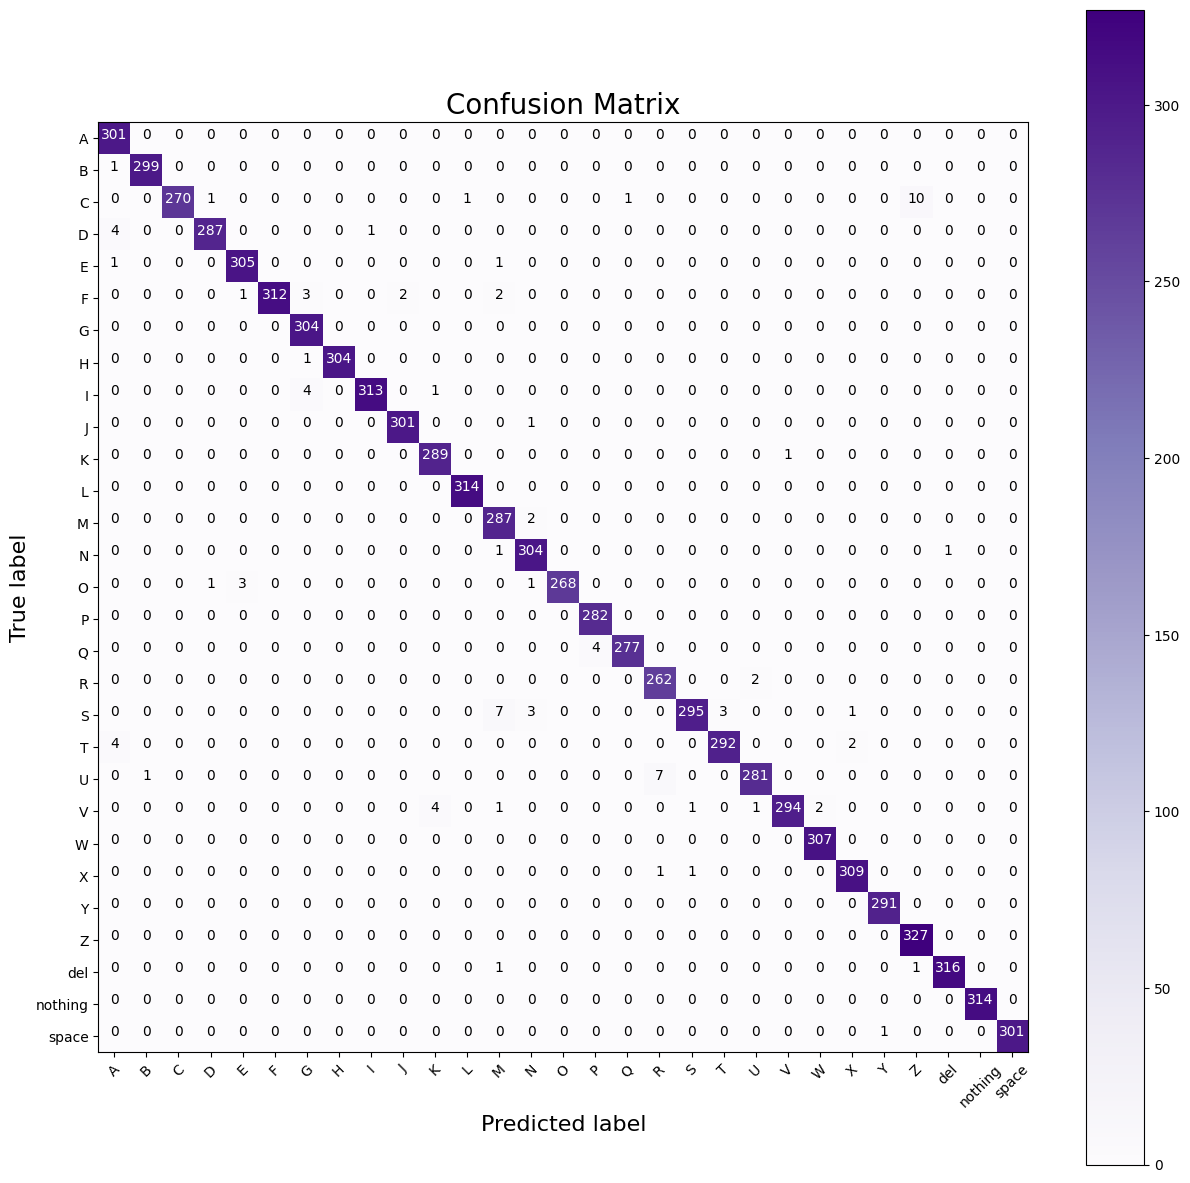

In [ ]:
def plot_confusion_matrix(y, y_pred):
  cm = confusion_matrix(y, y_pred)
  plt.figure(figsize = (15, 15))
  ax = plt.subplot()
  plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
  plt.colorbar()
  plt.title("Confusion Matrix")
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels, rotation=45)
  plt.yticks(tick_marks, labels)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ax.title.set_fontsize(20)
  ax.xaxis.label.set_fontsize(16)
  ax.yaxis.label.set_fontsize(16)
  limit = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
  plt.show()

plot_confusion_matrix(y_testing, y_pred)

1/1 [==============================] - 0s 21ms/step
Prediction of image is: C



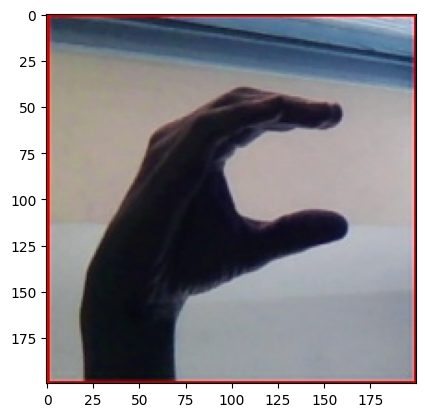

In [ ]:
testimage = []
img = cv2.imread('/content/asl_alphabet_test/asl_alphabet_test/C_test.jpg')
plt.imshow(img)
img = cv2.resize(img, (32, 32))
testimage.append(img)
np_x = np.array(testimage)
imge = np_x.astype('float32') / 255
predict = np.argmax(model.predict(imge), axis = -1)

if predict[0] == 0:
  prediction = 'A'
elif predict[0] == 1:
  prediction = 'B'
elif predict[0] == 2:
  prediction = 'C'
elif predict[0] == 3:
  prediction = 'D'
elif predict[0] == 4:
  prediction = 'E'
elif predict[0] == 5:
  prediction = 'F'
elif predict[0] == 6:
  prediction = 'G'
elif predict[0] == 7:
  prediction = 'H'
elif predict[0] == 8:
  prediction = 'I'
elif predict[0] == 9:
  prediction = 'J'
elif predict[0] == 10:
  prediction = 'K'
elif predict[0] == 11:
  prediction = 'L'
elif predict[0] == 12:
  prediction = 'M'
elif predict[0] == 13:
  prediction = 'N'
elif predict[0] == 14:
  prediction = 'O'
elif predict[0] == 15:
  prediction = 'P'
elif predict[0] == 16:
  prediction = 'Q'
elif predict[0] == 17:
  prediction = 'R'
elif predict[0] == 18:
  prediction = 'S'
elif predict[0] == 19:
  prediction = 'T'
elif predict[0] == 20:
  prediction = 'U'
elif predict[0] == 21:
  prediction = 'V'
elif predict[0] == 22:
  prediction = 'W'
elif predict[0] == 23:
  prediction = 'X'
elif predict[0] == 24:
  prediction = 'Y'
elif predict[0] == 25:
  prediction = 'Z'
elif predict[0] == 26:
  prediction = 'del'
elif predict[0] == 27:
  prediction = 'nothing'
elif predict[0] == 28:
  prediction = 'space'
else:
  prediction = 'invalid'
    
print('Prediction of image is:', prediction)
print('')